# Download dataset from: https://www.kaggle.com/datasets/sayanf/flickr8k

### Citations -
https://www.analyticsvidhya.com/blog/2021/01/implementation-of-attention-mechanism-for-caption-generation-on-transformers-using-tensorflow/

In [41]:
import string
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import glob

from tqdm import tqdm

from enum import Enum
from array import array

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

2023-04-19 20:46:44.005716: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data preprocessing and Dataset cleanup

In [21]:
# class syntax
class DataSplit(Enum):
    TRAIN = 0
    VAL = 1
    TEST = 2

MAX_TOKENIZED_LENGTH = 36

image_dir_path = "./archive/Flickr8k_Dataset/"
caption_file_path = './archive/Flickr8k_text/Flickr8k.token.txt'
train_img_file_path = './archive/Flickr8k_text/Flickr_8k.trainImages.txt'
test_img_file_path = './archive/Flickr8k_text/Flickr_8k.testImages.txt'
val_img_file_path = './archive/Flickr8k_text/Flickr_8k.devImages.txt'
images = os.listdir(image_dir_path)
captions_text = open(caption_file_path,'r').read()

print("Total Images in Dataset - {}\n".format(len(images)))
print("Sample Caption Details - \n{}".format(captions_text[:696]))


Total Images in Dataset - 9091

Sample Caption Details - 
1000268201_693b08cb0e.jpg#0	A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg#1	A girl going into a wooden building .
1000268201_693b08cb0e.jpg#2	A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg#3	A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg#4	A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg#0	A black dog and a spotted dog are fighting
1001773457_577c3a7d70.jpg#1	A black dog and a tri-colored dog playing with each other on the road .
1001773457_577c3a7d70.jpg#2	A black dog and a white dog with brown spots are staring at each other in the street .


Captions Text to Dictionary

In [22]:
captions = dict()
for line in captions_text.split('\n'):
        tokens = line.split()
        if len(line) > 2:
          image_id = tokens[0].split('.')[0]
          image_desc = ' '.join(tokens[1:])
          if image_id not in captions:
              captions[image_id] = list()
          captions[image_id].append(image_desc)

Basic Text clean-up to convert all text to lower case and remove punctuations

In [23]:
table = str.maketrans('', '', string.punctuation)
for key, caption_list in captions.items():
    for i in range(len(caption_list)):
        desc = caption_list[i]
        desc = desc.split()
        desc = [word.lower() for word in desc]
        desc = [word.translate(table) for word in desc]
        caption_list[i] =  ' '.join(desc).strip()

Sample Image and caption

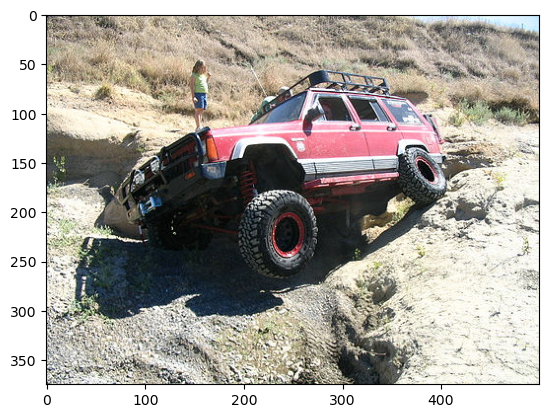

['a four wheel drive car is navigating along a rocky off road trail',
 'a jeep sidewalks on some rocks',
 'a red jeep hangs from the edge of a rocky cliff as a girl looks on',
 'a red truck is driving over a rocky surface',
 'a woman stands next to a red suv that has run off into a ditch']

In [24]:
pic = '36422830_55c844bc2d.jpg'
x=plt.imread(image_dir_path+pic)
plt.imshow(x)
plt.show()
captions['36422830_55c844bc2d']

# Pre Process Text

Creating Vocabulary; Caption Tokenizer and padding

In [25]:
vocabulary = set()
for key in captions.keys():
        [vocabulary.update(d.split()) for d in captions[key]]

original_vocab_size = len(vocabulary)
        
print('Original Vocabulary Size: %d' % original_vocab_size)

Original Vocabulary Size: 8828


In [26]:
#Can Explore reducing the vocab size based on running experiments

In [27]:
def tokenize(x):
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(x)
    t=tokenizer.texts_to_sequences(x)
    return t, tokenizer

In [28]:
def pad(x, length=None):
    padding=pad_sequences(x,padding='post',maxlen=length)
    return padding

In [29]:
all_captions_list = list()
for image_id in captions.keys():
    [all_captions_list.append(caption) for caption in captions[image_id]]

max_length = max(len(caption.split()) for caption in all_captions_list)
print('Description Length: %d' % max_length)

Description Length: 36


In [30]:
caption_tokenized, text_tokenizer = tokenize(all_captions_list)
print(text_tokenizer.word_index)
print()

for i in range(5):
    print('Input:  {}'.format(all_captions_list[i]))
    print('Output: {}'.format(caption_tokenized[i]))

{'a': 1, 'in': 2, 'the': 3, 'on': 4, 'is': 5, 'and': 6, 'dog': 7, 'with': 8, 'man': 9, 'of': 10, 'two': 11, 'white': 12, 'black': 13, 'boy': 14, 'are': 15, 'woman': 16, 'girl': 17, 'to': 18, 'wearing': 19, 'at': 20, 'people': 21, 'water': 22, 'red': 23, 'young': 24, 'brown': 25, 'an': 26, 'his': 27, 'blue': 28, 'dogs': 29, 'running': 30, 'through': 31, 'playing': 32, 'while': 33, 'down': 34, 'shirt': 35, 'standing': 36, 'ball': 37, 'little': 38, 'grass': 39, 'child': 40, 'person': 41, 'snow': 42, 'jumping': 43, 'over': 44, 'front': 45, 'three': 46, 'sitting': 47, 'holding': 48, 'field': 49, 'small': 50, 'up': 51, 'by': 52, 'large': 53, 'green': 54, 'one': 55, 'group': 56, 'yellow': 57, 'her': 58, 'walking': 59, 'children': 60, 'men': 61, 'into': 62, 'air': 63, 'beach': 64, 'near': 65, 'mouth': 66, 'jumps': 67, 'another': 68, 'for': 69, 'street': 70, 'runs': 71, 'its': 72, 'from': 73, 'riding': 74, 'stands': 75, 'as': 76, 'bike': 77, 'girls': 78, 'outside': 79, 'other': 80, 'out': 81, '

In [31]:
len(all_captions_list)

40460

In [32]:
caption_padded = pad(caption_tokenized)

for i in range(5):
    print('Input:  {}'.format(caption_tokenized[i]))
    print('Output: {}'.format(caption_padded[i]))

Input:  [1, 40, 2, 1, 88, 168, 5, 117, 51, 1, 394, 10, 391, 2, 26, 5221, 691]
Output: [   1   40    2    1   88  168    5  117   51    1  394   10  391    2
   26 5221  691    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
Input:  [1, 17, 312, 62, 1, 192, 115]
Output: [  1  17 312  62   1 192 115   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Input:  [1, 38, 17, 117, 62, 1, 192, 2429]
Output: [   1   38   17  117   62    1  192 2429    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
Input:  [1, 38, 17, 117, 3, 391, 18, 58, 2429]
Output: [   1   38   17  117    3  391   18   58 2429    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
Input:  [1, 38, 17, 2, 1, 88, 168, 312, 62, 1, 192, 2992]
Outpu

Generating Train and Test Sets

In [33]:
train_img = open(train_img_file_path,'r').read()
train = list()
for line in train_img.split('\n'):
    if len(line) > 1:
      image_id = line.split('.')[0]
      train.append(image_id)
train = set(train)
print('Train Dataset size: %d' % len(train))


test_img = open(test_img_file_path,'r').read()
test = list()
for line in test_img.split('\n'):
    if len(line) > 1:
      image_id = line.split('.')[0]
      test.append(image_id)
test = set(test)
print('Test Dataset size: %d' % len(test))


val_img = open(val_img_file_path,'r').read()
val = list()
for line in val_img.split('\n'):
    if len(line) > 1:
      image_id = line.split('.')[0]
      val.append(image_id)
val = set(val)
print('Validation Dataset size: %d' % len(val))

Train Dataset size: 6000
Test Dataset size: 1000
Validation Dataset size: 1000


In [34]:
images = glob.glob(image_dir_path + '*.jpg')

In [35]:
train_images = set(open(train_img_file_path, 'r').read().strip().split('\n'))
train_img = []
for i in images: 
    if i[len(image_dir_path):] in train_images:
        train_img.append(i)
        
test_images = set(open(test_img_file_path, 'r').read().strip().split('\n'))
test_img = []
for i in images: 
    if i[len(image_dir_path):] in test_images: 
        test_img.append(i)
        
val_images = set(open(val_img_file_path, 'r').read().strip().split('\n'))
val_img = []
for i in images: 
    if i[len(image_dir_path):] in val_images: 
        val_img.append(i)

print('Train Dataset size: %d' % len(train_img))
print('Test Dataset size: %d' % len(test_img))
print('Validation Dataset size: %d' % len(val_img))

Train Dataset size: 6000
Test Dataset size: 1000
Validation Dataset size: 1000


In [36]:
train_captions = dict()
for image_id in captions.keys():
    if image_id in train:
        if image_id not in train_captions:
            train_captions[image_id] = list()
        for caption in captions[image_id]:
            new_caption = 'startseq ' + caption + ' endseq'
            train_captions[image_id].append(new_caption)
        

print('Train Captions size: %d\n' % len(train_captions))
print("Caption before - \n {}\n".format(captions['36422830_55c844bc2d']))
print("Caption after - \n {}".format(train_captions['36422830_55c844bc2d']))

Train Captions size: 6000

Caption before - 
 ['a four wheel drive car is navigating along a rocky off road trail', 'a jeep sidewalks on some rocks', 'a red jeep hangs from the edge of a rocky cliff as a girl looks on', 'a red truck is driving over a rocky surface', 'a woman stands next to a red suv that has run off into a ditch']

Caption after - 
 ['startseq a four wheel drive car is navigating along a rocky off road trail endseq', 'startseq a jeep sidewalks on some rocks endseq', 'startseq a red jeep hangs from the edge of a rocky cliff as a girl looks on endseq', 'startseq a red truck is driving over a rocky surface endseq', 'startseq a woman stands next to a red suv that has run off into a ditch endseq']


In [85]:
# Save the plaintext and tokenized captions per image filename in dicts
# Args: Enum DataSplit split type
# Return: (plaintext_caption list, tokenized_caption list)
def save_final_text_split(split_type):
    # Get the split type we're working with
    split_set = None
    if split_type == DataSplit.TRAIN:
        split_set = train
    if split_type == DataSplit.VAL:
        split_set = val
    if split_type == DataSplit.TEST:
        split_set = test

    # Parse out the captions + tokenize
    plaintext_captions = dict()
    token_captions = dict()
    for image_id in captions.keys():
        if image_id in split_set:
            if image_id not in plaintext_captions:
                plaintext_captions[image_id] = list()
            for caption in captions[image_id]:
                new_caption = 'startseq ' + caption + ' endseq'
                plaintext_captions[image_id].append(new_caption)
            token_captions[image_id] = pad(text_tokenizer.texts_to_sequences(plaintext_captions[image_id]), max_length)
    
    return plaintext_captions, token_captions

train_captions, tok_train_captions = save_final_text_split(DataSplit.TRAIN)
val_captions, tok_val_captions = save_final_text_split(DataSplit.VAL)
test_captions, tok_test_captions = save_final_text_split(DataSplit.TEST)

print("EXAMPLE")
print(f"Train Captions size: {len(train_captions)}\n")
print(f"Caption before - \n {captions['36422830_55c844bc2d']}\n")
print(f"Caption after - \n {train_captions['36422830_55c844bc2d']}\n")
print(f"Tokenized captions - \n {tok_train_captions['36422830_55c844bc2d']}\n")

EXAMPLE
Train Captions size: 6000

Caption before - 
 ['a four wheel drive car is navigating along a rocky off road trail', 'a jeep sidewalks on some rocks', 'a red jeep hangs from the edge of a rocky cliff as a girl looks on', 'a red truck is driving over a rocky surface', 'a woman stands next to a red suv that has run off into a ditch']

Caption after - 
 ['startseq a four wheel drive car is navigating along a rocky off road trail endseq', 'startseq a jeep sidewalks on some rocks endseq', 'startseq a red jeep hangs from the edge of a rocky cliff as a girl looks on endseq', 'startseq a red truck is driving over a rocky surface endseq', 'startseq a woman stands next to a red suv that has run off into a ditch endseq']

Tokenized captions - 
 [[   1  118  610 1438  137    5 3075  111    1  219   85  153  320    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   1  900 8237    4   99  206    0    0    0    0    0    0 

# Pre-process Images (Using pre-Trained Inception V3)

cite:- https://towardsdatascience.com/image-captions-with-attention-in-tensorflow-step-by-step-927dad3569fa (TODO: params changes & image cleanup, for now just for understanding)

We will use a pre-trained Inception model, We download this pre-trained model, truncate the Classifier section and encode the training images. The features for each encoded image are saved in a separate file using the image name and another extension eg. ‘1000268201_693b08cb0e.npy’

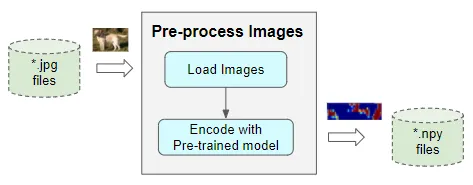

In [18]:
#=== helper function to preprocess image using inception_v3
def preprocess_image(img_path):
    image = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image, channels=3)
    # preprocess all the images to the same size, i.e, 299×299
    image = tf.image.resize(image, (299, 299))
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, img_path

In [21]:
#=== creating a feature extract model, ignoring the last softmax layer as we need feature vector.
cnn_model = tf.keras.applications.InceptionV3(include_top=False)
cnn_input = cnn_model.input
cnn_hidden_layer = cnn_model.layers[-1].output

features_extract_model = tf.keras.Model(cnn_input, cnn_hidden_layer)

KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 2048), dtype=tf.float32, name=None), name='mixed10/concat:0', description="created by layer 'mixed10'")


In [23]:
#=== pre processing Images in the same path as images earlier.
#Get unique images so set
encode_train = sorted(set(test_img))

#batch_size according to system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)

#preprocessing images in batches
image_dataset = image_dataset.map(preprocess_image, num_parallel_calls = tf.data.experimental.AUTOTUNE).batch(32)

#features_extract_model model to extract feature vector
#We extract the features and store them in the respective .npy files
for image, path in tqdm(image_dataset):
    if os.path.exists(f'{path}.npy'):
        continue
    batched_features = features_extract_model(image)
    print(batched_features.shape)
    batched_features = tf.reshape(batched_features, (batched_features.shape[0], -1, batched_features.shape[3]))
    print(batched_features.shape)

    for bf, p in zip(batched_features, path):
        feature_path = p.numpy().decode("utf-8")
        np.save(feature_path, bf.numpy(), allow_pickle=True, fix_imports=True)

  0%|          | 0/32 [00:00<?, ?it/s]2023-04-19 21:13:15.129649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1000]
	 [[{{node Placeholder/_0}}]]
  3%|▎         | 1/32 [00:02<01:30,  2.92s/it]

(32, 64, 2048)


  6%|▋         | 2/32 [00:05<01:27,  2.91s/it]

(32, 64, 2048)


  6%|▋         | 2/32 [00:08<02:09,  4.33s/it]


KeyboardInterrupt: 

In [92]:
# map function to load image files
def map_function(image_name, caption):
   image_tensor = np.load(image_name.decode('utf-8')+'.npy')
   return image_tensor, caption

def batch_data(dict):
    BATCH_SIZE = 64
    BUFFER_SIZE = 1000
    
    X = np.array(list(dict.keys()))
    Y = np.array(list(dict.values()))
    
    batched_dataset = tf.data.Dataset.from_tensor_slices((X, Y))

    # Use map to load the numpy files in parallel
    batched_dataset = batched_dataset.map(lambda item1, item2: tf.numpy_function(map_function, [item1, item2], [tf.float32, tf.int32]),num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # Shuffle and batch
    batched_dataset = batched_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    batched_dataset = batched_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return batched_dataset

In [93]:
batched_dataset = batch_data(tok_train_captions)

In [94]:
batched_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int32, name=None))>